# Lab No.2

## Juan Fernando González
20170085

## Libraries

In [144]:
# Libraries

import pandas as pd
import numpy as np
from numpy.linalg import inv
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline

## File

In [2]:
filepath = r'dataset\\'
df = pd.read_csv(filepath + 'Admission_Predict.csv')

## Dataframe information

In [3]:
# First values of dataframe 

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Last values of dataset

df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
# Shpe of the dataframe

print(df.shape)

(400, 9)


In [6]:
# Null values 

print('----- NaN Values -----\n')
count_nan = len(df) - df.count()
count_nan

----- NaN Values -----



Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Let's see the types od each feature

In [7]:
print('   ----- Types -----\n')

df.dtypes

   ----- Types -----



Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

Let's add some information abut the variables we have, so we can understand the data easier.  

1. GRE: The graduate record examination (GRE) is a standardized exam used to measure one's aptitude for abstract thinking in the areas of analytical writing, mathematics, and vocabulary. The minimun score to pass this exam is 260.

2. TOEFL: Is a test which measures people’s English language skills to see if they are good enough to take a course at university or graduate school in English-speaking countries.

3. SOP: Statement of purpose , is a long essay required by universities abroad and nowadays some of the Indian universities during the application process. As the full form of SOP reveals, a Statement of Purpose is an essay stating the purpose of applying to a particular course in a particular university.

4. LOR: The Letter of Recommendation is a document that provides the admission officers with a comprehensive insight into your suitable candidature, for admission into the concerned University.

4. CGPA: Cumulative Grade Point Average, it is used in schools and colleges to measure overall academic performance of a student. 

5. Reaserch: Research Experience ( ranging from 0 to 1 )

6. Chance of Admit: Chance of Admit ( ranging from 0 to 1 )

## Data Exploration

### Data imputation and data cleaning

In [8]:
# Re-naming the columns

df.columns = ['Serial_No', 'GRE_S', 'TOEFL_S', 'Uni_Rating', 'SOP','LOR', 'CGPA', 'Research', 'Chance_of_A']

df.head()

,Serial_No,GRE_S,TOEFL_S,Uni_Rating,SOP,LOR,CGPA,Research,Chance_of_A
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Serial No. column

Let's see the unique value of this column...

In [9]:
# Unique values 

df.Serial_No.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

### GRE Score column

In [10]:
# Unique values 

df.GRE_S.unique()

array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328,
       307, 311, 317, 319, 318, 303, 312, 334, 336, 340, 298, 295, 310,
       300, 338, 331, 320, 299, 304, 313, 332, 326, 329, 339, 309, 315,
       301, 296, 294, 306, 305, 290, 335, 333, 297, 293], dtype=int64)

### TOEFL Score column

In [11]:
# Unique values 

df.TOEFL_S.unique()

array([118, 107, 104, 110, 103, 115, 109, 101, 102, 108, 106, 111, 112,
       105, 114, 116, 119, 120,  98,  93,  99,  97, 117, 113, 100,  95,
        96,  94,  92], dtype=int64)

### University Rating column

In [12]:
# Unique values 

df.Uni_Rating.unique()

array([4, 3, 2, 5, 1], dtype=int64)

### SOP column

In [13]:
# Unique values 

df.SOP.unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

### LOR column

In [14]:
# Unique values 

df.LOR.unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

### CGPA column

In [15]:
# Unique values 

df.CGPA.unique()

array([9.65, 8.87, 8.  , 8.67, 8.21, 9.34, 8.2 , 7.9 , 8.6 , 8.4 , 9.  ,
       9.1 , 8.3 , 8.7 , 8.8 , 8.5 , 9.5 , 9.7 , 9.8 , 9.6 , 7.5 , 7.2 ,
       7.3 , 8.1 , 9.4 , 9.2 , 7.8 , 7.7 , 9.3 , 8.85, 7.4 , 7.6 , 6.8 ,
       8.92, 9.02, 8.64, 9.22, 9.16, 9.64, 9.76, 9.45, 9.04, 8.9 , 8.56,
       8.72, 8.22, 7.54, 7.36, 8.02, 9.36, 8.66, 8.42, 8.28, 8.14, 8.76,
       7.92, 7.66, 8.03, 7.88, 7.84, 8.96, 9.24, 8.88, 8.46, 8.12, 8.25,
       8.47, 9.05, 8.78, 9.18, 9.46, 9.38, 8.48, 8.68, 8.34, 8.45, 8.62,
       7.46, 7.28, 8.84, 9.56, 9.48, 8.36, 9.32, 8.71, 9.35, 8.65, 9.28,
       8.77, 8.16, 9.08, 9.12, 9.15, 9.44, 9.92, 9.11, 8.26, 9.43, 9.06,
       8.75, 8.89, 8.69, 7.86, 9.01, 8.97, 8.33, 8.27, 7.98, 8.04, 9.07,
       9.13, 9.23, 8.32, 8.98, 8.94, 9.53, 8.52, 8.43, 8.54, 9.91, 9.87,
       7.65, 7.89, 9.14, 9.66, 9.78, 9.42, 9.26, 8.79, 8.23, 8.53, 8.07,
       9.31, 9.17, 9.19, 8.37, 7.68, 8.15, 8.73, 8.83, 8.57, 9.68, 8.09,
       8.17, 7.64, 8.01, 7.95, 8.49, 7.87, 7.97, 8.

### Research column

In [16]:
# Unique values 

df.Research.unique()

array([1, 0], dtype=int64)

### Chance of Admit column

In [17]:
# Unique values 

df.Chance_of_A.unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39])

## Data Visualization

### Histogram for each feature

#### GRE Score

Text(0, 0.5, 'Frequency')

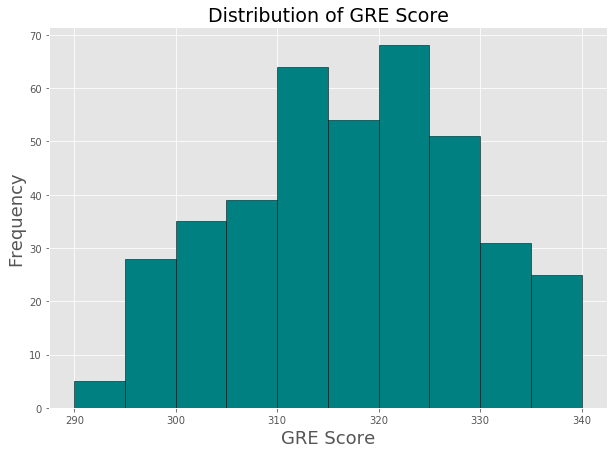

In [18]:
# Histogram (or Distribution plot)

plt.style.use('ggplot')

# Histogram of the Price
df.GRE_S.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of GRE Score', size=19)
plt.xlabel('GRE Score', size=18)
plt.ylabel('Frequency', size=18)

The most frecuent score is between 310 and 325. But let's get the mean of this column, so we can get the real mean.

In [19]:
# Mean of the GRE Score

print('The mean of the GRE score is: ', df.GRE_S.mean())

# Min score
print('The min of the GRE score is: ', df.GRE_S.min())


The mean of the GRE score is:  316.8075
The min of the GRE score is:  290


As we can see above, most of the students gets between 310 - 325 score, so that mean that they won the exam with a good grade.

#### TOEFL Score

Text(0, 0.5, 'Frequency')

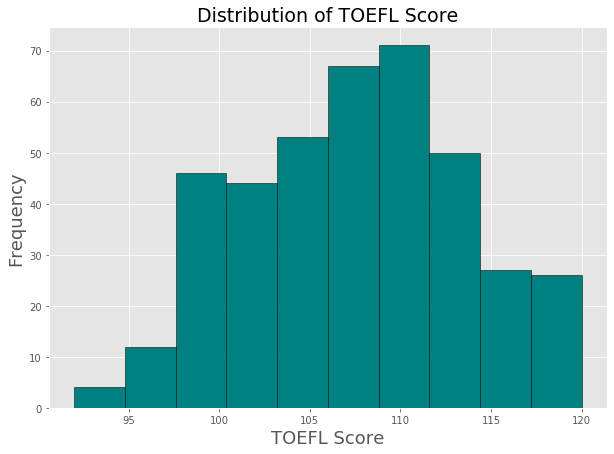

In [20]:
# Histogram of the TOEFL Score

df.TOEFL_S.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of TOEFL Score', size=19)
plt.xlabel('TOEFL Score', size=18)
plt.ylabel('Frequency', size=18)

It seems that the TOEFL Score mean is between 105-110.

In [21]:
# Mean of the GRE Score

print('The mean of the TOEFL score is: ', df.TOEFL_S.mean())

The mean of the TOEFL score is:  107.41


#### University Rating

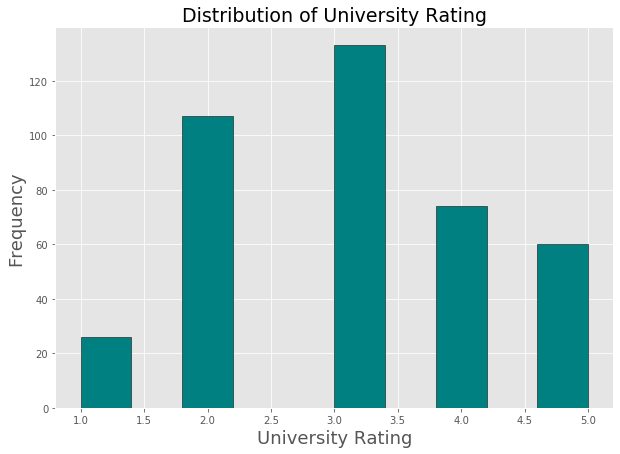

In [22]:
# Histogram of the University Rating

df.Uni_Rating.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of University Rating', size=19)
plt.xlabel('University Rating', size=18)
plt.ylabel('Frequency', size=18)
plt.show()

In [23]:
# Mean of the University Rating

print('The mean of the Univeristy Rating is: ', df.Uni_Rating.mean())

The mean of the Univeristy Rating is:  3.0875


#### SOP

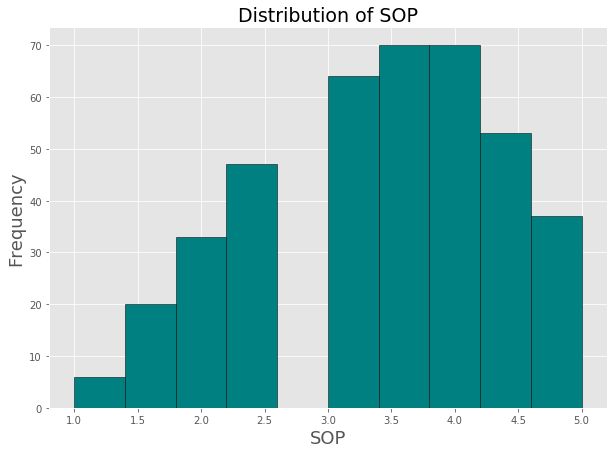

In [24]:
# Histogram of the SOP Score

df.SOP.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of SOP', size=19)
plt.xlabel('SOP', size=18)
plt.ylabel('Frequency', size=18)
plt.show()

In [25]:
# Mean of the SOP

print('The mean of the Univeristy Rating is: ', df.SOP.mean())

The mean of the Univeristy Rating is:  3.4


#### LOR

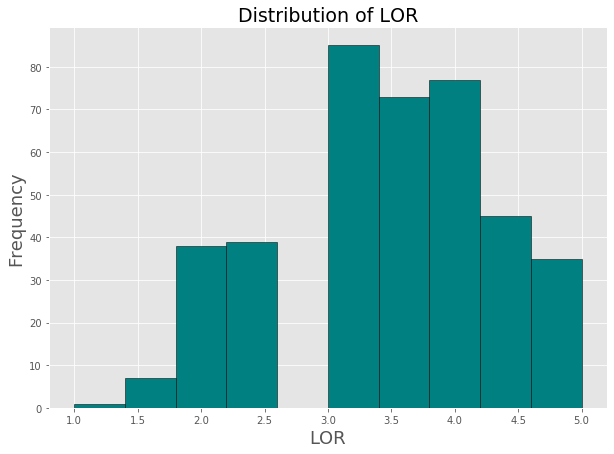

In [26]:
# Histogram of the LOR

df.LOR.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of LOR', size=19)
plt.xlabel('LOR', size=18)
plt.ylabel('Frequency', size=18)
plt.show()

In [27]:
# Mean of the LOR

print('The mean of the LOR is: ', df.LOR.mean())

The mean of the LOR is:  3.4525


#### CGPA

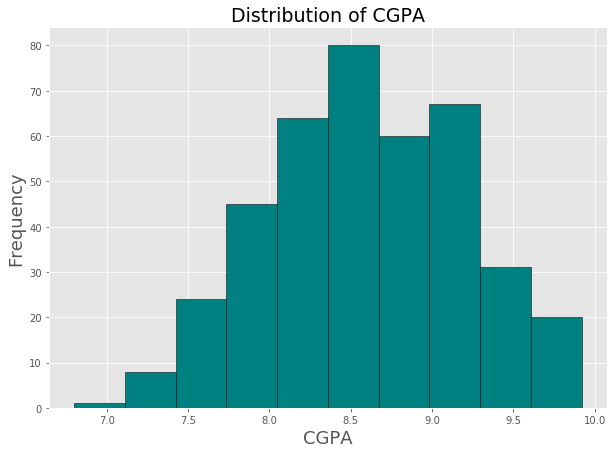

In [28]:
# Histogram of the CGPA

df.CGPA.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of CGPA', size=19)
plt.xlabel('CGPA', size=18)
plt.ylabel('Frequency', size=18)
plt.show()

In [29]:
# Mean of the CGPA

print('The mean of the CGPA is: ', df.CGPA.mean())

The mean of the CGPA is:  8.598925


Most of the students gets an average of 8.5 of CGPA, wich is a good overall academic performance of a student.

#### Research

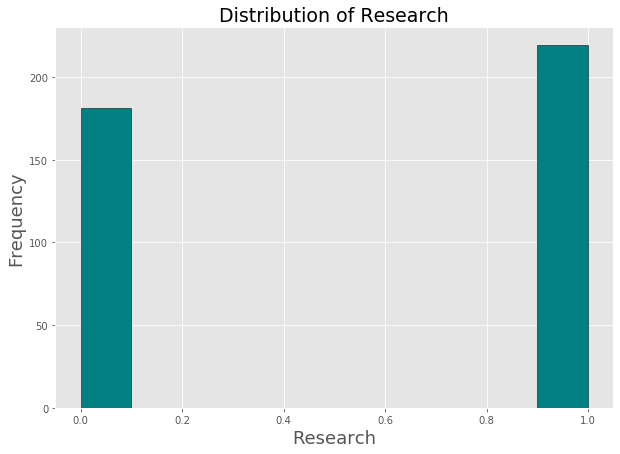

In [30]:
# Histogram of the Research

df.Research.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Research', size=19)
plt.xlabel('Research', size=18)
plt.ylabel('Frequency', size=18)
plt.show()

In [31]:
# Mean of the Research

print('The mean of the Research is: ', df.Research.mean())

The mean of the Research is:  0.5475


#### Chance of Admit

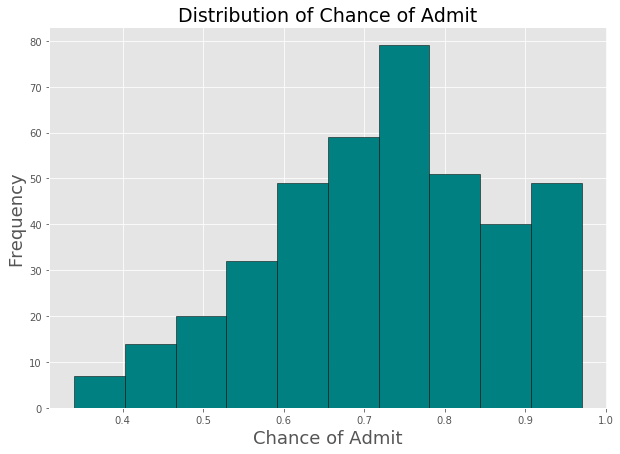

In [32]:
# Histogram of the TOEFL Score

df.Chance_of_A.plot(kind='hist',color='teal',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Chance of Admit', size=19)
plt.xlabel('Chance of Admit', size=18)
plt.ylabel('Frequency', size=18)
plt.show()

In [33]:
# Mean of the Research

print('The mean of the Distribution of Chance of Admit is: ', df.Chance_of_A.mean())

The mean of the Distribution of Chance of Admit is:  0.72435


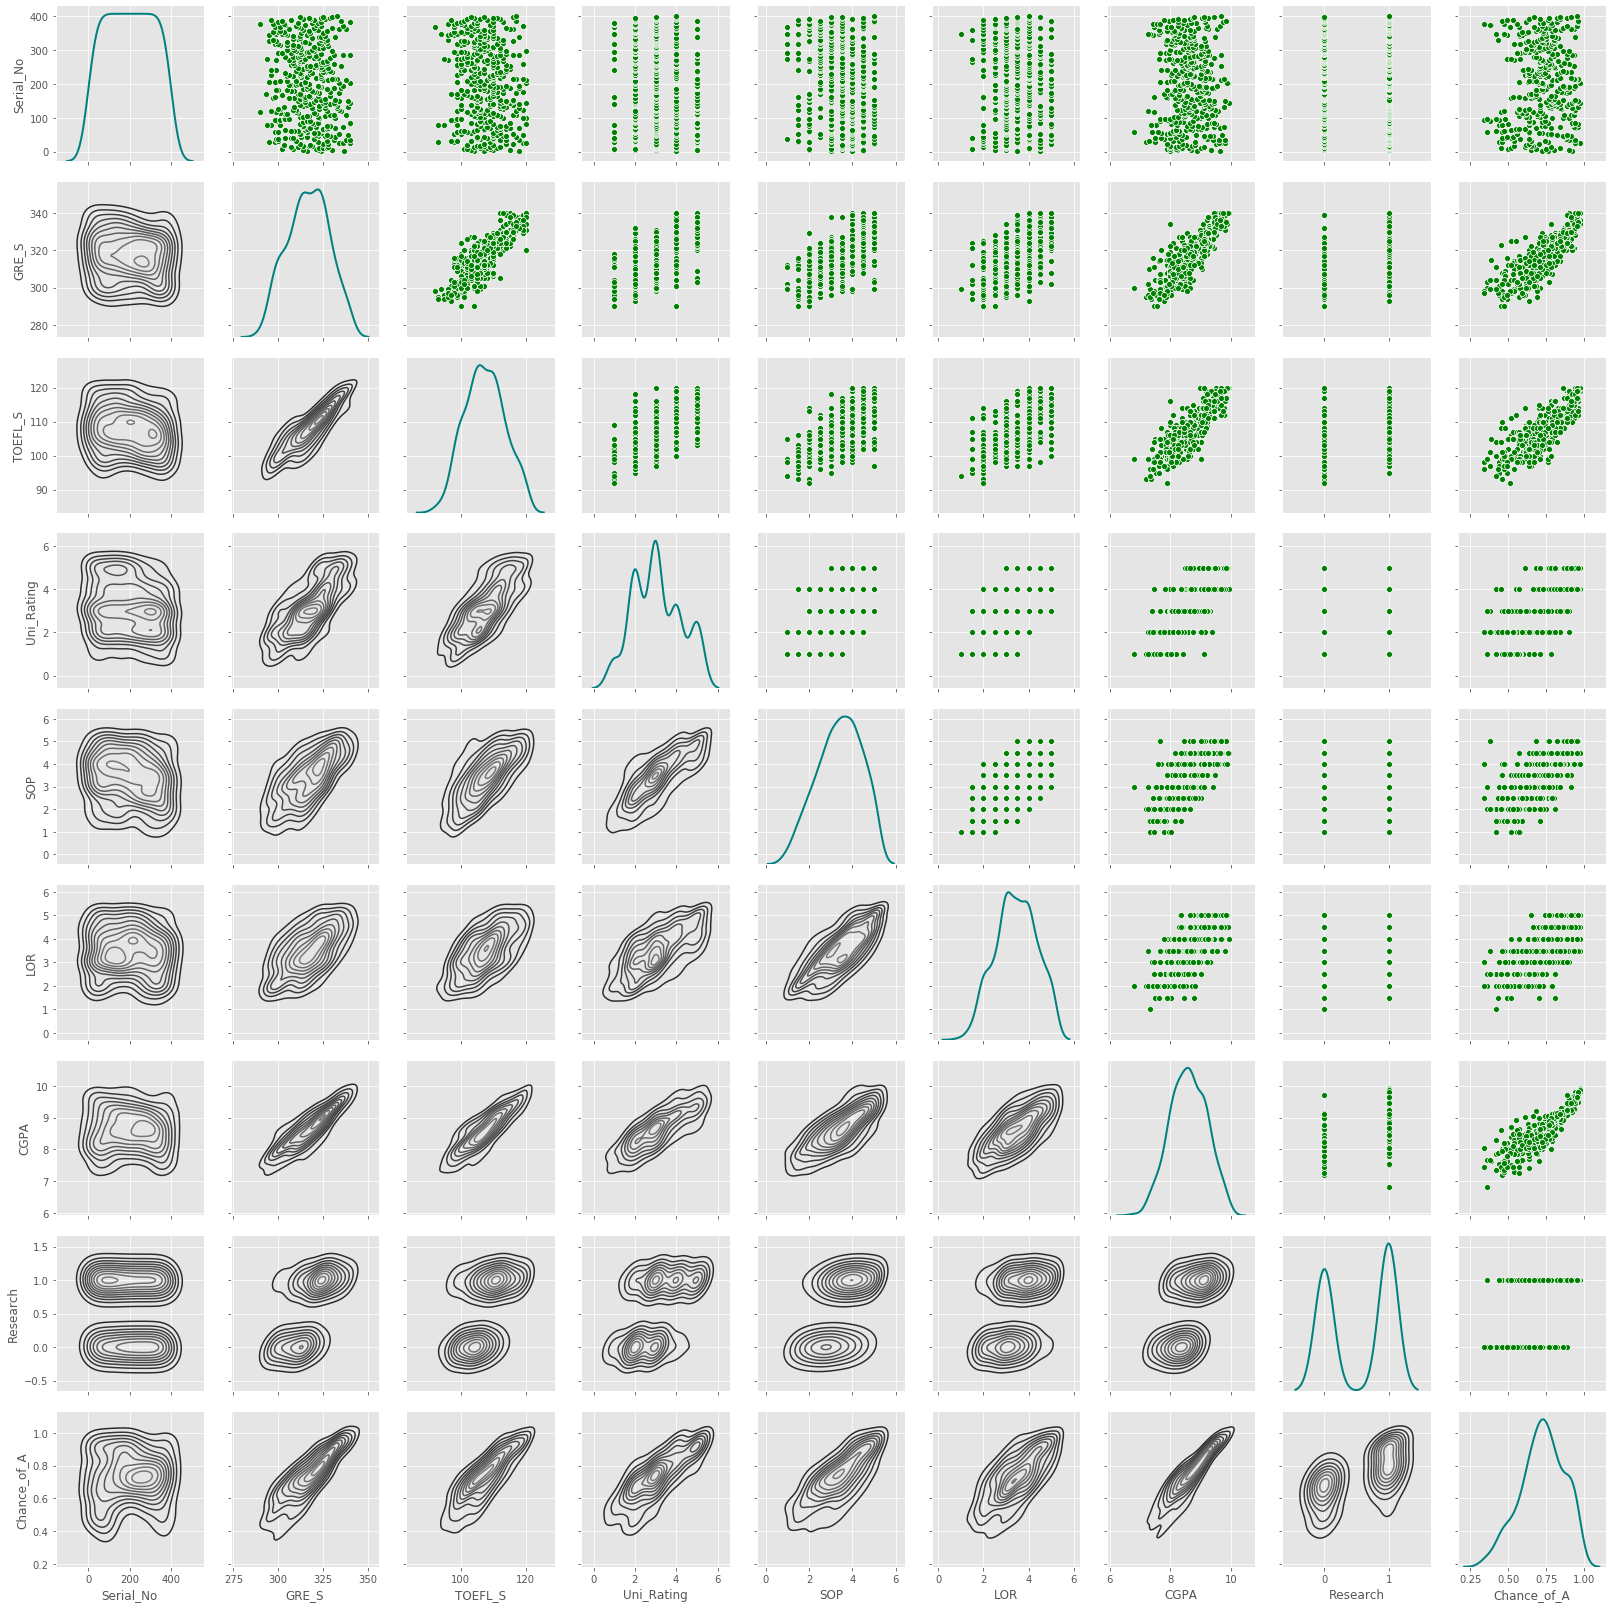

In [34]:
g = sns.PairGrid(df, diag_sharey=False) 
g.map_lower(sns.kdeplot, color='gray')
g.map_upper(sns.scatterplot, color='green')
g.map_diag(sns.kdeplot, lw=2,color='teal')
plt.show()

## Correlation

[Text(0.5, 1, 'Correlation')]

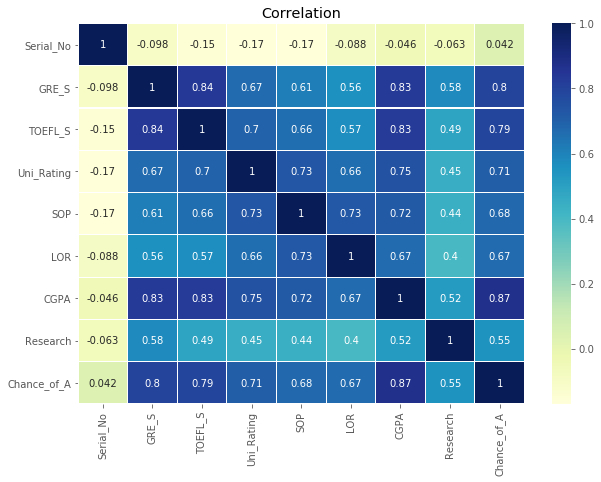

In [35]:
corrmat = df.corr(method='pearson') 
  
f, ax = plt.subplots(figsize =(10,7)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True)
ax.set(title='Correlation')

As we can see above, chance of admit is highly correlated with GRE Score, TOEFL Score and CGPA. So this could be our possible features to test our model. 

## Feature Selection

Let's see the shape of our features...

First we will see our *dependent variable*

### Dependent Variable

#### Chance of admit

In [36]:
print('Chance of admit shape: \n', df.Chance_of_A.shape)

Chance of admit shape: 
 (400,)


So as we can see in the cell above, it have 400 rows but no columns... We need to add a new axis (column) to continue with our analysis.

In [37]:
# Adding a new a axis to the item size column

y_s = np.array(df['Chance_of_A'])[np.newaxis].T

y_s.shape

(400, 1)

Now, let's see out independent variables...

### Independent Variables

#### GRE Score

In [38]:
print('GRE Score shape: \n', df.GRE_S.shape)

GRE Score shape: 
 (400,)


In [39]:
# Adding a new a axis to the GRE Score column

x_gre = np.array(df['GRE_S'])[np.newaxis].T

x_gre.shape

(400, 1)

Let's normalize our feature

In [147]:
# Normalize

norm = preprocessing.MinMaxScaler()
x_gre_scaled = norm.fit_transform(x_gre)
df_normalized = pd.DataFrame(x_gre_scaled)

x_gre_scaled.shape

(400, 1)

#### TOEFL Score

In [40]:
print('TOEFL Score shape: \n', df.TOEFL_S.shape)

TOEFL Score shape: 
 (400,)


In [41]:
# Adding a new a axis to the TOEFL Score column

x_toefl = np.array(df['TOEFL_S'])[np.newaxis].T

x_toefl.shape

(400, 1)

In [151]:
# Normalize

norms = preprocessing.MinMaxScaler()
x_toefl_scaled = norms.fit_transform(x_toefl)
df_normalized = pd.DataFrame(x_toefl_scaled)

x_toefl_scaled.shape

(400, 1)

#### CGPA

In [42]:
print('CGPA shape: \n', df.CGPA.shape)

CGPA shape: 
 (400,)


In [43]:
# Adding a new a axis to the CGPA column

x_cgpa = np.array(df['CGPA'])[np.newaxis].T

x_cgpa.shape

(400, 1)

In [158]:
# Normalize

norma = preprocessing.MinMaxScaler()
x_cgpa_scaled = norma.fit_transform(x_cgpa)
df_normalized = pd.DataFrame(x_cgpa_scaled)

x_cgpa_scaled.shape

(400, 1)

## Vectorial Gradient Descent

### Cost Function

In [48]:
def cost(x, y, theta, lam):
    '''
    Calculates the cost for given X and Y. 

    theta:
        Vector.
    x:
        Row vector 
    y: 
        Vector

    pred: 
        # h(theta), Nos da todas las hipotesis
        
     lamb:
        Normalize the cost function 
    '''

    m = len(y)

    pred = x.dot(theta)
    
    # Function cost normalized
    
    j = (1 / 2 * m) * np.sum(np.square(pred - y)) + (lam / 2 * m) * np.sum(np.square(theta))

    return j

### Gradient Descent Function

In [49]:
def gradient_descent(x, y, theta, alpha, max_it, lamb):
    '''
    Returns the final theta vector.

    alpha: 
        Learning rate
    X:
        Matrix of X with added bias.
        dim :
            m,2
    Y: 
        Vector of Y

    theta:
        dim: 
            m,1 
            
    lamb:
        Normalize the function 
    '''

    m = len(y)

    cost_history = np.zeros(max_it)
    #alm_theta = np.zeros((max_it, 2))

    for i in range(max_it):

        pred = np.dot(x, theta)
        
        theta = theta - alpha * ((1 / m) * (x.T.dot((pred - y)))) + (lamb / m) * theta
        
        #alm_theta[i, :] = theta.T
        
        cost_history[i] = cost(x, y, theta, lamb)

    return theta, cost_history

## Cross Validation

In [50]:
def cross_validation(x_s, y_s, theta, alpha, max_it, lamb):

    X_train, X_test, y_train, y_test = train_test_split(
        x_s, y_s, test_size=0.20, random_state=50)
    
    # get thetas and cost history with the train set
    
    thetas, cost_h = gradient_descent(X_train, y_train, theta, alpha, max_it, lamb)

    print("Theta: \n", thetas)
    
    # Calculate cost with the test set
    
    cost_ = cost(X_test, y_test, thetas, lamb)
    print("\nCost: \n", cost_)

    return thetas, cost_h

## Data Input

In [47]:
"""
Dependent Variable: 
    
    Chance of Acceptance:
        x_gre
    
Independent Variables:
    
    TOEFL Score:
        x_toefl
        x_toefl_scaled
    
    CGPA: 
        x_cgpa
        x_cgpa_scaled
        
    GRE Score:
        x_gre
        x_gre_scaled
"""

#### Chance of admit vs CGPA

In [179]:
lamb = 0.001
alpha = 0.1
max_it = 1000

x_s = x_cgpa_scaled

X_vStack = np.c_[np.ones((len(x_s), 1)), x_s]

f, c = X_vStack.shape

theta = np.random.rand(c, 1)

gd_theta, cost_history = cross_validation(X_vStack, y_s, theta, alpha, max_it, lamb)

Theta: 
 [[0.35232854]
 [0.64523493]]

Cost: 
 17.34264905159113


#### Plot PRED Chance of admit vs CGPA

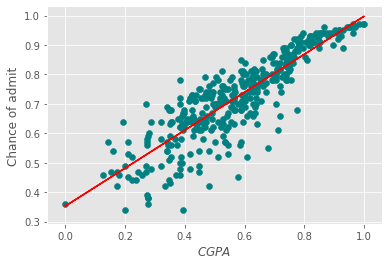

In [180]:
plt.scatter(x_s, y_s, color='teal')
y = gd_theta[1] * x_s + gd_theta[0]
plt.plot(x_s, y, '-r')
plt.xlabel("$CGPA$", fontsize=12)
plt.ylabel("Chance of admit", fontsize=12)
#plt.axhline(0, color='black')
#plt.axvline(0, color='black')
plt.show()

As we can see in the graphic below, there's a positive relationship between the Chance of admit and the CGPA, that means that a good CGPA means a greater chance of admit for a student.

##### Cost History

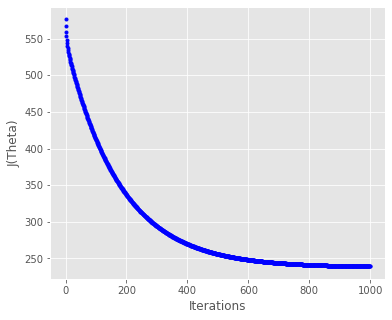

In [181]:
fig,ax = plt.subplots(figsize=(6,5))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(max_it),cost_history,'b.')

The cost at first was very high, but over the iterations the cost start to went down, and it was a very low cost at all.

#### Chance of admit vs TOEFL

In [187]:
lamb = 0.1
alpha = 0.1
max_it = 1000

x_s = x_toefl_scaled

X_vStack = np.c_[np.ones((len(x_s), 1)), x_s]

f, c = X_vStack.shape

theta = np.random.rand(c, 1)

gd_theta, cost_history = cross_validation(X_vStack, y_s, theta, alpha, max_it, lamb)

Theta: 
 [[0.4304267 ]
 [0.53893209]]

Cost: 
 22.478962998519187


#### Plot PRED Chance of admit vs TOEFL Score

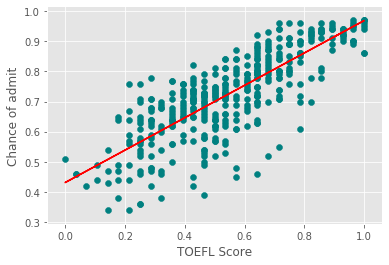

In [190]:
plt.scatter(x_s, y_s, color='teal')
y = gd_theta[1] * x_s + gd_theta[0]
plt.plot(x_s, y, '-r')
plt.xlabel("TOEFL Score", fontsize=12)
plt.ylabel("Chance of admit", fontsize=12)
#plt.axhline(0, color='black')
#plt.axvline(0, color='black')
plt.show()

We can see that TOEFL Score have a strong relationship between Chanse of admit, but, in this case, our model is very inefficient, it took 10,000,000 iterations to reach this prediction and get the cost we get, so it's not the best feature to predict if a student is admited or not. 

##### Cost History

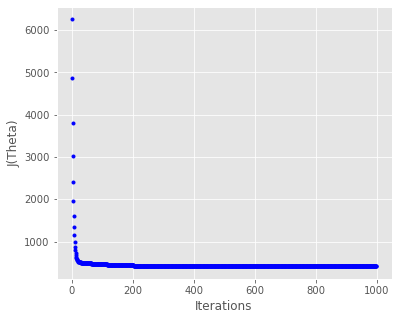

In [191]:
fig,ax = plt.subplots(figsize=(6,5))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(max_it),cost_history,'b.')

The same as the first one, the cost at firts is very high, but the accolumative cost is clearly higher.

#### Chance of admit vs GRE Score

In [198]:
lamb = 0.1
alpha = 0.1
max_it = 1000

x_s = x_gre_scaled

X_vStack = np.c_[np.ones((len(x_s), 1)), x_s]

f, c = X_vStack.shape

theta = np.random.rand(c, 1)

gd_theta, cost_history = cross_validation(X_vStack, y_s, theta, alpha, max_it, lamb)

Theta: 
 [[0.43893571]
 [0.53558348]]

Cost: 
 24.58725605925609


#### Plot PRED Chance of admit vs GRE Score

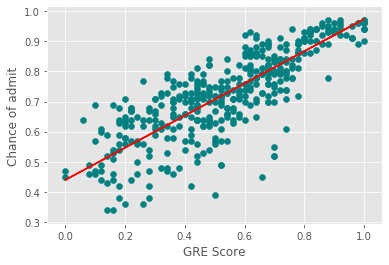

In [199]:
plt.scatter(x_s, y_s, color='teal')
y = gd_theta[1] * x_s + gd_theta[0]
plt.plot(x_s, y, '-r')
plt.xlabel("GRE Score", fontsize=12)
plt.ylabel("Chance of admit", fontsize=12)
#plt.axhline(0, color='black')
#plt.axvline(0, color='black')
plt.show()

##### Cost History

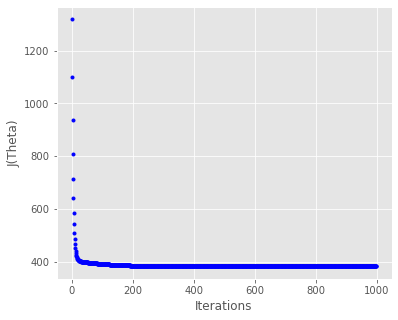

In [200]:
fig,ax = plt.subplots(figsize=(6,5))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(max_it),cost_history,'b.')